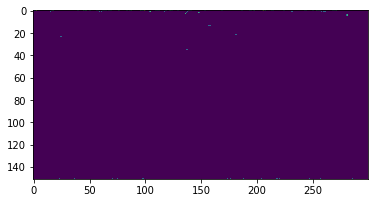

In [2]:
import numpy as np
import matplotlib.pyplot as plt
nwalkers=150
width=300
height=150
seed=123
def neighbor(matrix,i,j):
    x = [-1,0,1]
    y = [-1,0,1]
    for m in x:
        for n in y:
            if(m!=0 or n!=0):                
                if((i+m>=0 and i+m<matrix.shape[0]) and (j+n>=0)and(j+n<matrix.shape[1])):
                    if matrix[i+m,j+n]>0: 
                        return True
    return False
def update(matrix,i,width):
    stay = []
    for j in range(width):
        if(matrix[i,j]>0):
            if(neighbor(matrix,i,j)): 
                stay.append((i,j))
    for j in range(width):
        if matrix[i,j] > 0:
            if (i,j) not in stay:
                for k in range(matrix[i,j]):
                    update_j = j + np.random.binomial(1,0.5)*2-1
                    update_i = i + 1
                    if(update_j>=0 and update_j<width):
                        matrix[update_i,update_j] += 1
                matrix[i,j] = 0
    return matrix

def dla(nwalkers, width, height, seed):
    np.random.seed(seed)
    matrix = np.zeros((height+1,width),dtype=int)
    index = np.random.randint(0,width,nwalkers)
    for idx in index:
        matrix[0,idx]+=1
    for i in range(height):
        matrix = update(matrix,i,width)
    return matrix
matrix = dla(nwalkers, width, height, seed)
plt.imshow(matrix)
pass